In [263]:
from keras import models
from keras import layers

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

# for confusion matrix (old way)
import itertools
from sklearn.metrics import confusion_matrix

# for confusion matrix (new way)
from sklearn.metrics import plot_confusion_matrix

In [264]:
data_set = pd.read_csv("xor_data.csv")
data_set.head()

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0
4,0,0,0


In [265]:
data_set.shape

(800, 3)

## Splitting

In [266]:
X = data_set[["x1", "x2"]].to_numpy()
y = data_set["y"].to_numpy()

In [267]:
print(X.shape)
print(y.shape)

(800, 2)
(800,)


In [268]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [269]:
print(X_train.shape)
print(X_test.shape)

(640, 2)
(160, 2)


In [270]:
X_test

array([[1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 1],
       [0, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0,

## Parameters

In [271]:
epoch = 100
activ = ["sigmoid", "relu", "softmax"]

#hidden layers
layer_1 = 15
layer_2 = 10

## Network

In [272]:
network = models.Sequential()

network.add(layers.Dense(layer_1, activation=activ[1], input_shape = (2,)))
network.add(layers.Dense(layer_2, activation=activ[0]))

# Output Layer
network.add(layers.Dense(1, activation=activ[0]))

In [273]:
network.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 15)                45        
                                                                 
 dense_43 (Dense)            (None, 10)                160       
                                                                 
 dense_44 (Dense)            (None, 1)                 11        
                                                                 
Total params: 216
Trainable params: 216
Non-trainable params: 0
_________________________________________________________________


In [274]:
network.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [275]:
history = network.fit(X_train, y_train, epochs=epoch, shuffle=True, verbose=1, validation_split= 0.1)

Epoch 1/100
18/18 [==============================] - 1s 8ms/step - loss: 0.7059 - accuracy: 0.4965 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4965 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6862 - accuracy: 0.4965 - val_loss: 0.6828 - val_accuracy: 0.5000
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.4965 - val_loss: 0.6778 - val_accuracy: 0.5000
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.6424 - val_loss: 0.6726 - val_accuracy: 0.7812
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6712 - accuracy: 0.7500 - val_loss: 0.6676 - val_accuracy: 0.7812
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6662 - accuracy: 0.7674 - val_loss: 0.6622 - val_accuracy: 0.7812
Epoch 8/100
1

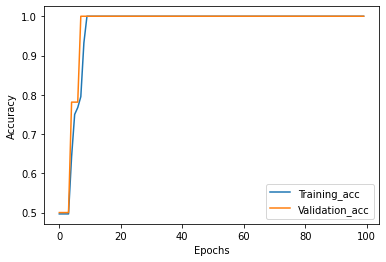

In [276]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training_acc", "Validation_acc"])
plt.show()

In [277]:
prediction = network.predict(x = X_test)
prediction

array([[9.9928355e-01],
       [3.5682321e-04],
       [3.5682321e-04],
       [2.8294325e-04],
       [2.8294325e-04],
       [9.9928355e-01],
       [3.5682321e-04],
       [2.8294325e-04],
       [3.5682321e-04],
       [9.9928445e-01],
       [9.9928355e-01],
       [2.8294325e-04],
       [9.9928355e-01],
       [9.9928445e-01],
       [9.9928445e-01],
       [3.5682321e-04],
       [9.9928445e-01],
       [9.9928445e-01],
       [9.9928355e-01],
       [9.9928445e-01],
       [3.5682321e-04],
       [9.9928355e-01],
       [9.9928445e-01],
       [9.9928355e-01],
       [3.5682321e-04],
       [9.9928445e-01],
       [9.9928355e-01],
       [2.8294325e-04],
       [3.5682321e-04],
       [9.9928355e-01],
       [9.9928355e-01],
       [9.9928355e-01],
       [2.8294325e-04],
       [3.5682321e-04],
       [9.9928445e-01],
       [9.9928445e-01],
       [3.5682321e-04],
       [9.9928445e-01],
       [9.9928355e-01],
       [2.8294325e-04],
       [2.8294325e-04],
       [9.992835

In [278]:
prediction.shape

(160, 1)

In [ ]:
for i in range(10):
    print(prediction[i])

In [279]:
#rounded_prediction = np.argmax(prediction, axis = 1) # axis = 1 (through rows)
#rounded_prediction

In [280]:
rounded_prediction = np.round(prediction) # as we have only one output neuron. argmax cannot be used in this case. So simple rounding off the predicited array will suffice

In [ ]:
for i in range(10):
    print(rounded_prediction[i])

In [281]:
for i in range(10):
    print(rounded_prediction[i], y_test[i])

[1.] 1
[0.] 0
[0.] 0
[0.] 0
[0.] 0
[1.] 1
[0.] 0
[0.] 0
[0.] 0
[1.] 1


## Confusion Matrix

In [282]:
# 1. Variant
# Code is copied from Scikit website

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[78  0]
 [ 0 82]]


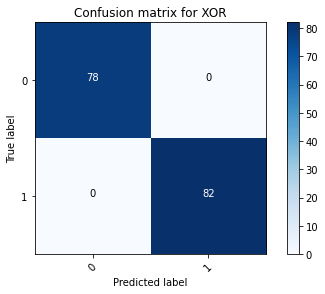

In [283]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_prediction)

# Create labels for my plot --> Classes
cm_plot_labels = ["0", "1"]

plot_confusion_matrix(cm= cm, classes= cm_plot_labels, title= "Confusion matrix for XOR")